In [1]:
import numpy as np
from scipy.special import gamma

def generate_auto_covariance_map(N, beta, rho_0, w):
    """
    Generate theoretical auto-covariance maps for SLODAR.

    Parameters:
    - N: number of subapertures across the telescope pupil
    - beta: power-law exponent for the generalized spectrum
    - rho_0: Fried parameter
    - w: subaperture width

    Returns:
    - L_map: longitudinal auto-covariance map
    - T_map: transverse auto-covariance map
    """
    # Constants
    A_beta = (2**(beta-2) * gamma((beta+2)/2)**2 * gamma((beta+4)/2) * gamma(beta/2) * np.sin(np.pi*(beta-2)/2)) / (np.pi**beta * (beta+1))
    gamma_beta = (2**(beta-1) * gamma((beta+2)/2)**2 * gamma((beta+4)/2)) / (gamma(beta/2) * (beta+1))

    # Create grid
    x = np.arange(-N+1, N)
    y = np.arange(-N+1, N)
    X, Y = np.meshgrid(x, y)
    R = np.sqrt(X**2 + Y**2) * w

    # Calculate structure function
    D_phi = gamma_beta * (R / rho_0)**(beta-2)

    # Calculate covariance functions
    C_phi = A_beta * rho_0**(2-beta) * (1 - D_phi/2)

    # Calculate longitudinal and transverse auto-covariance maps
    L_map = np.zeros_like(C_phi)
    T_map = np.zeros_like(C_phi)

    for i in range(2*N-1):
        for j in range(2*N-1):
            if i == N-1 and j == N-1:
                continue  # Skip the center point

            r = np.sqrt((i-N+1)**2 + (j-N+1)**2)
            if r == 0:
                continue

            cos_theta = (i-N+1) / r
            sin_theta = (j-N+1) / r

            L_map[i, j] = (cos_theta**2 * C_phi[i, j] - 
                          0.5 * cos_theta**2 * D_phi[i, j])
            T_map[i, j] = (sin_theta**2 * C_phi[i, j] - 
                          0.5 * sin_theta**2 * D_phi[i, j])

    return L_map, T_map

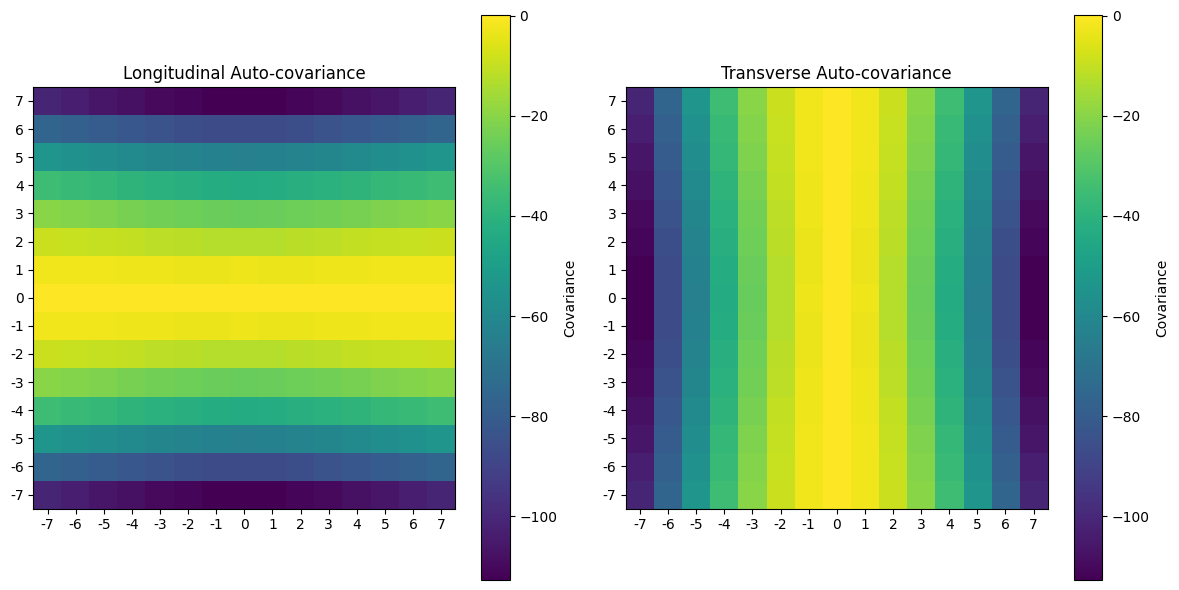

In [2]:
N = 8  # For an 8x8 subaperture array
beta = 11/3  # Kolmogorov turbulence
rho_0 = 0.15  # 15 cm
w = 0.05  # 5 cm subapertures

L_map, T_map = generate_auto_covariance_map(N, beta, rho_0, w)

# Plotting the maps (requires matplotlib)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.imshow(L_map, origin='lower', cmap='viridis')
plt.colorbar(label='Covariance')
plt.title('Longitudinal Auto-covariance')
plt.xticks(range(2*N-1), range(-N+1, N))
plt.yticks(range(2*N-1), range(-N+1, N))


plt.subplot(122)
plt.imshow(T_map, origin='lower', cmap='viridis')
plt.colorbar(label='Covariance')
plt.title('Transverse Auto-covariance')
plt.xticks(range(2*N-1), range(-N+1, N))
plt.yticks(range(2*N-1), range(-N+1, N))

plt.tight_layout()
plt.show()